In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import  make_scorer,r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import ValidationCurve
import joblib
import warnings
import logging
from sklearn.model_selection import RandomizedSearchCV
# Suppress all warnings for cleaner output
warnings.filterwarnings('ignore')

# Specifically suppress the font finding messages from matplotlib
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [2]:
data = pd.read_csv('process/data_scaled.csv')
data.head()

,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,gini_index,City_Tier_Other,City_Tier_Tier 1,City_Tier_Tier 2,City_Tier_Tier 3,Restaurant Location_Near Business Hub,Restaurant Location_Near Party Hub,Endorsed By_Local Celebrity,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity
0,0.631148,0.754200,0.958763,1.0,1.0,1.0,0.0,1.0,1.0,0.6,...,0.909091,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.762295,0.774288,0.773196,1.0,1.0,1.0,1.0,0.0,1.0,0.6,...,0.454545,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.475410,0.766983,0.484536,1.0,1.0,1.0,1.0,0.0,1.0,0.6,...,0.636364,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.000000,0.777940,0.749141,0.0,1.0,1.0,1.0,1.0,0.0,0.6,...,0.818182,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.434426,0.786706,0.472509,1.0,1.0,0.0,1.0,1.0,1.0,0.6,...,0.909091,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [3]:

X = data.drop(["Annual Turnover"],axis=1).copy()
y = data["Annual Turnover"].copy()


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [4]:
target = 0 # class you want to plot
scorer = make_scorer(lambda y_true, y_pred: r2_score(
    y_true, y_pred))

In [5]:
model = MLPRegressor()
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(model,X_train,y_train, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),scoring=scorer)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/home/barenas/miniconda3/envs/ml-venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barenas/miniconda3/envs/ml-venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barenas/miniconda3/envs/ml-venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barenas/miniconda3/envs/ml-venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

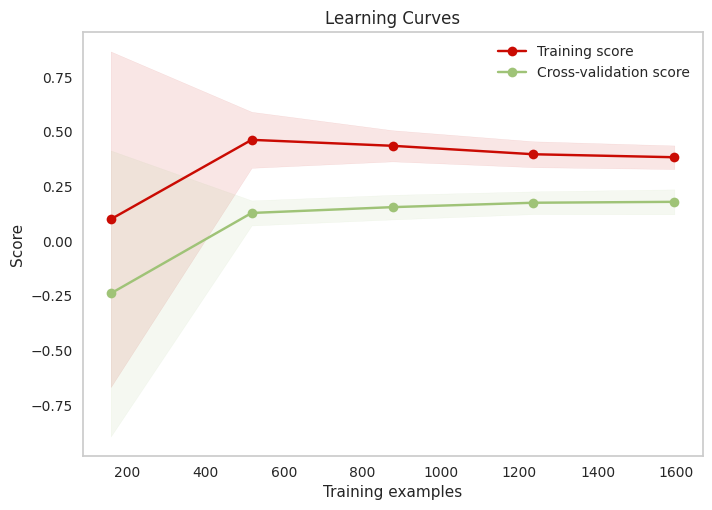

In [6]:
plt.figure()
plt.title("Learning Curves")    
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best");

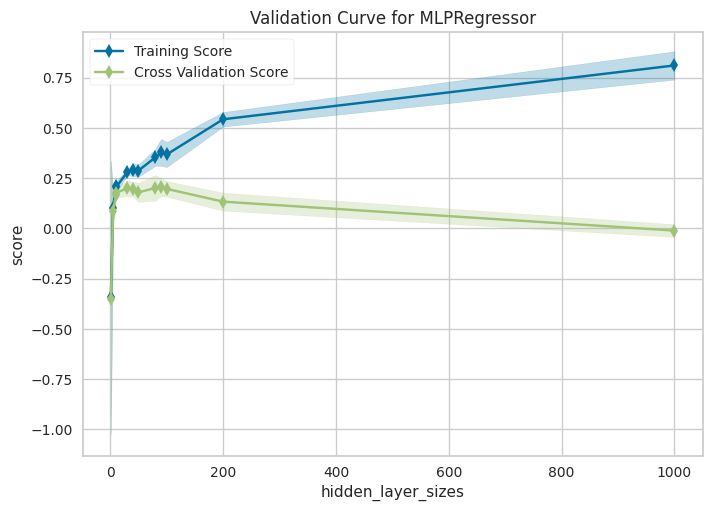

In [7]:
n = [1,5, 10, 10, 30, 40, 50, 80, 90, 100, 200, 1000]

# Create SVC model for validation curve
model = MLPRegressor()
viz = ValidationCurve(model,param_name='hidden_layer_sizes', param_range=n, cv=5, scoring=scorer)
viz.fit(X_train,y_train)
viz.show()

# Busqueda por grilla 

In [8]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 100), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 400, 800],
    'batch_size': ['auto', 32, 64, 128],
    'momentum': [0.9, 0.95, 0.99],
    'early_stopping': [True, False]
}

In [9]:
model = MLPRegressor()
rearch = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20,  scoring=scorer, random_state=1)
rearch.fit(X_train, y_train)
print("Bes score: ", rearch.best_score_
      , "Best params: ", rearch.best_params_)

Bes score:  0.24230485830148055 Best params:  {'solver': 'lbfgs', 'momentum': 0.9, 'max_iter': 400, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'early_stopping': True, 'batch_size': 'auto', 'alpha': 0.01, 'activation': 'logistic'}


In [10]:
best_params = rearch.best_params_

# Mejor modelo

In [20]:
model = MLPRegressor(**best_params)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

## Reporte test

In [18]:
def gen_report_test(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Annual Turnover")
    plt.ylabel("Predicted Annual Turnover")
    plt.title(f"Predicted vs Actual (R2={r2_score(y_test, y_pred):.2f})")
    plt.grid()
    plt.show()

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Annual Turnover")
    plt.ylabel("Predicted Annual Turnover")
    plt.title(f"Predicted vs Actual (R2={r2_score(y_test, y_pred):.2f})")
    plt.grid()
    plt.show()

    # Calculate residuals
    residuals = y_test - y_pred

    # Plotting Residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residuals vs. Predicted Values")
    plt.grid()
    plt.show()

    # Plotting a histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    plt.grid()
    plt.show()

R2 Score: 0.2644
Mean Absolute Error: 0.1539
Root Mean Squared Error: 0.1969


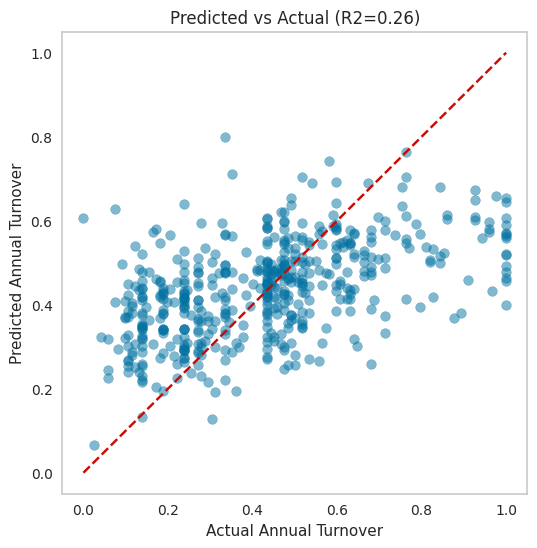

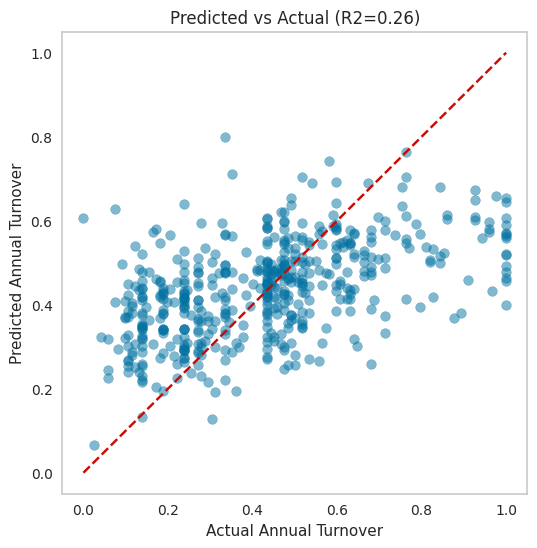

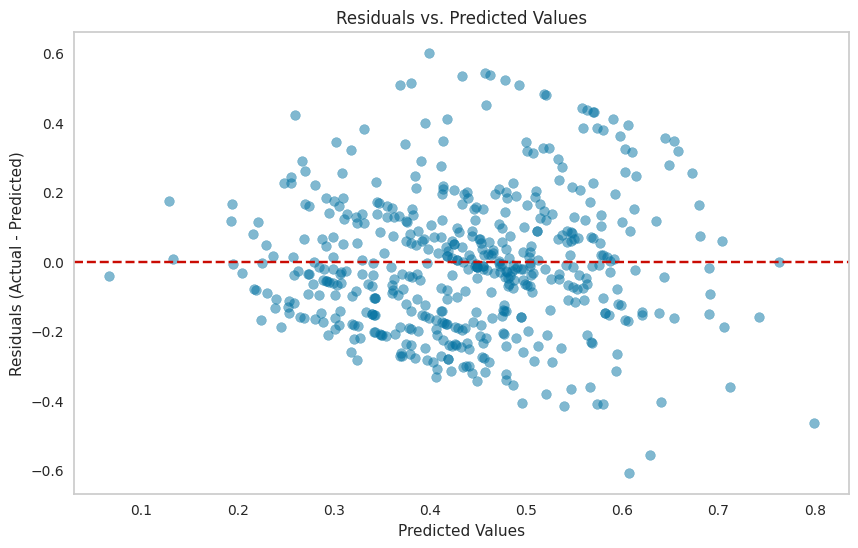

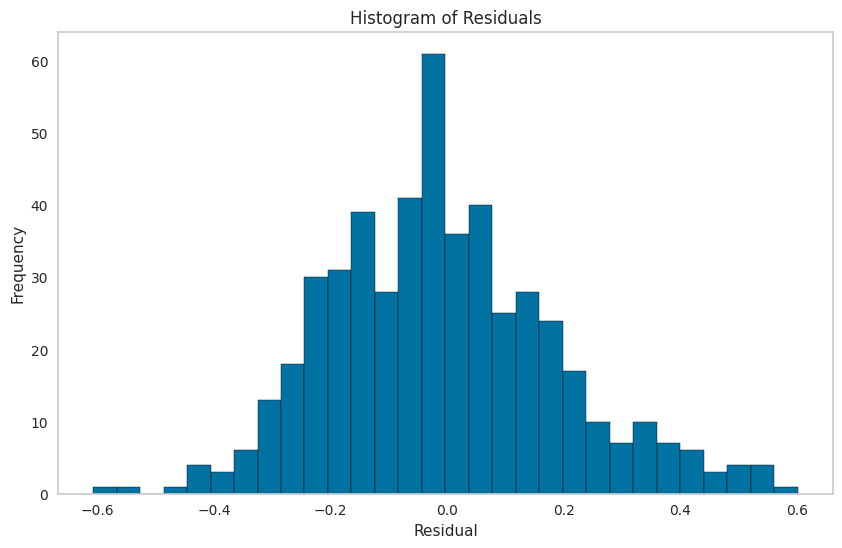

In [21]:
gen_report_test(y_test, y_pred)

In [14]:
def unscale_annual_turnover(scaled_data):
    scaler_y = joblib.load('models_encoders/minmax_scaler_y.pkl')
    return scaler_y.inverse_transform(scaled_data)

In [15]:
y_test_unscaled = unscale_annual_turnover(y_test.values.reshape(-1, 1))
y_pred_unscaled = unscale_annual_turnover(y_pred.reshape(-1, 1))

R2 Score: 0.2604
Mean Absolute Error: 9437526.4918
Root Mean Squared Error: 12043280.1709


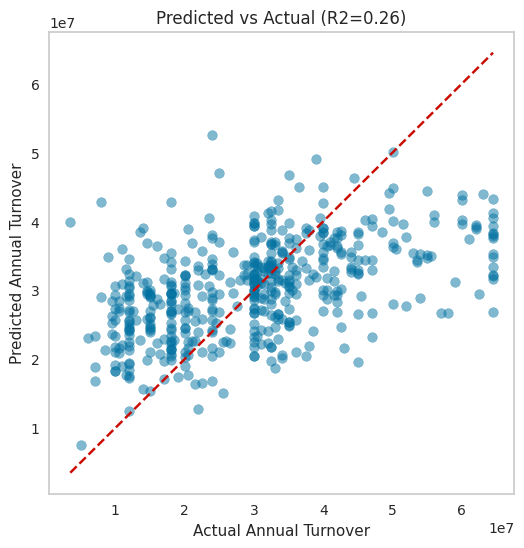

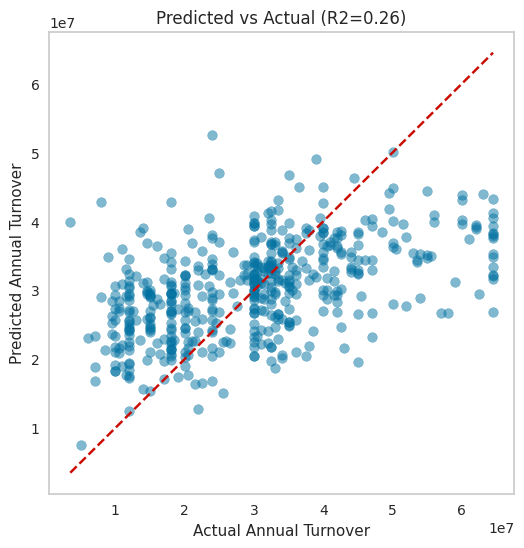

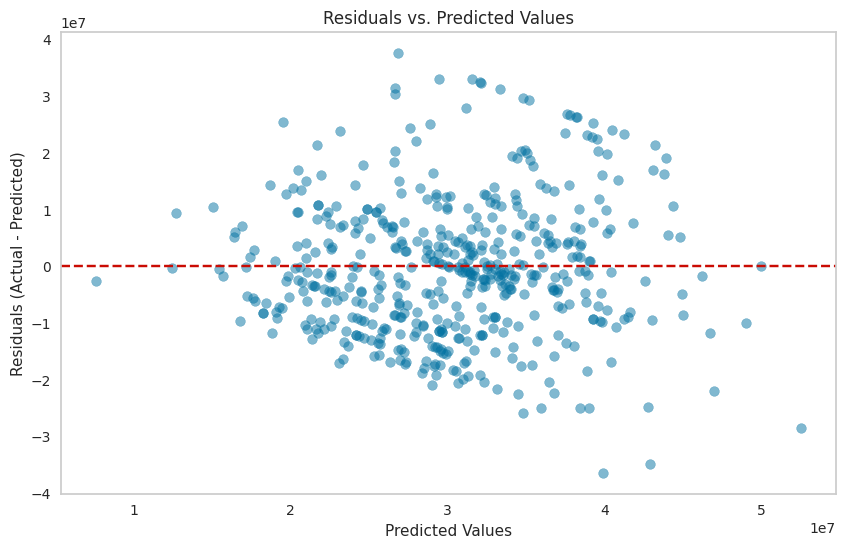

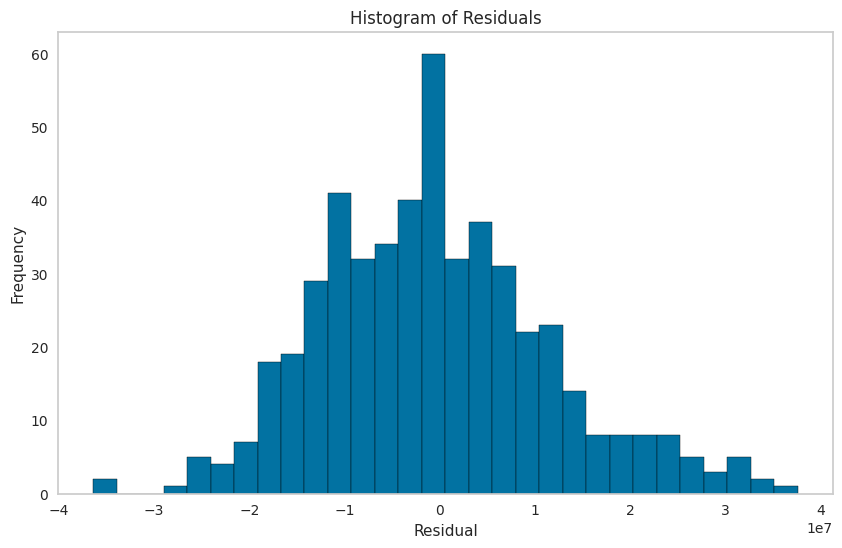

In [16]:
gen_report_test(y_test_unscaled, y_pred_unscaled)